# 경사하강법 (Gradient Descent)

기본 개념은 함수의 기울기(경사)를 구하여 기울기가 낮은 쪽으로 계속 이동시켜서 극값에 이를 때까지 반복시키는 것입니다.

**비용 함수 (Cost Function 혹은 Loss Function)를 최소화**하기 위해 반복해서 파라미터를 업데이트 해 나가는 방식입니다.

In [1]:
from IPython.display import Image
import numpy as np
import matplotlib.pyplot as plt
import warnings

# 경고 메시지 출력 표기 생략
warnings.filterwarnings('ignore')

Image(url='https://img.pngio.com/scikit-learn-batch-gradient-descent-versus-stochastic-gradient-descent-png-592_319.png')

## 샘플에 활용할 데이터 셋 만들기

In [2]:
def make_linear(w=0.5, b=0.8, size=50, noise=1.0):
    x = np.random.rand(size)
    y = w * x + b
    noise = np.random.uniform(-abs(noise), abs(noise), size=y.shape)
    yy = y + noise
    plt.figure(figsize=(10, 7))
    plt.plot(x, y, color='r', label=f'y = {w}x + {b}')
    plt.scatter(x, yy, label='data')
    plt.legend(fontsize=15)
    plt.show()
    print(f'w: {w}, b: {b}')
    return x, yy

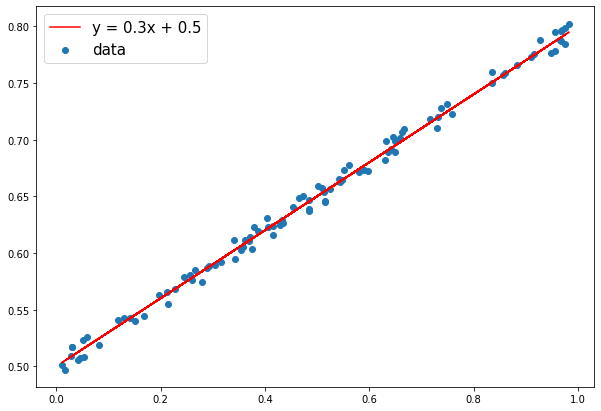

w: 0.3, b: 0.5


In [3]:
x, y = make_linear(w=0.3, b=0.5, size=100, noise=0.01)

## 초기값 (Initializer)과 y_hat (예측, prediction) 함수 정의

w, b 값에 대하여 random한 초기 값을 설정해 줍니다.

In [5]:
w = np.random.uniform(low=0.0, high=1.0)
b = np.random.uniform(low=0.0, high=1.0)
w, b

(0.3468582574620698, 0.9538667405610166)

`y_hat`은 `prediction`은 값 입니다. 즉, 가설함수에서 실제 값 (y)를 뺀 함수를 정의합니다.

In [7]:
# 코드를 입력해 주세요
y_hat = w * x + b
y_hat

array([1.28973411, 1.20704555, 1.24333288, 1.29191647, 1.08542982,
       1.08269697, 1.18521215, 1.20258686, 1.01220748, 0.95755314,
       1.27525545, 1.15844311, 1.11798294, 1.06309897, 1.11153933,
       1.14214851, 1.29000257, 1.0594991 , 1.29482179, 1.14277511,
       1.08380514, 1.02226607, 1.12221282, 1.13606386, 1.20758505,
       0.96969276, 0.99864414, 1.28577296, 1.24372629, 1.14493849,
       1.17774278, 1.27136738, 0.96822928, 1.07227546, 0.96422613,
       1.13043637, 0.98259865, 0.99502886, 1.28280939, 1.1325465 ,
       1.13214624, 1.07917993, 1.17900325, 1.25066067, 1.12188261,
       1.20973978, 1.26941538, 1.04390896, 0.97197423, 1.11515221,
       1.07815475, 1.10381025, 1.02804974, 1.12170309, 1.16111572,
       1.28537655, 0.95998778, 1.17272543, 1.04273648, 1.07299229,
       1.17450732, 0.96413203, 1.04640191, 1.13274706, 1.14417164,
       1.00654246, 1.21706497, 1.03252351, 1.17278961, 1.2897775 ,
       1.0980074 , 1.05529408, 1.18235211, 1.10479086, 1.03907

## 오차(Error) 정의

Loss Function 혹은 Cost Function을 정의 합니다.

Loss (Cost) Function은 예측값인 `y_hat`과 `y`의 차이에 **제곱의 평균**으로 정의합니다.

제곱은 오차에 대한 음수 값을 허용하지 않으며, 이는 **Mean Squared Error(MSE)**인 평균 제곱 오차 평가 지표와 관련 있습니다.

In [21]:
# 코드를 입력해 주세요
error =((y_hat - y)**2).mean()
error

9.435459639356727e+19

## 학습률 (Learning Rate)

In [22]:
Image(url='https://www.deeplearningwizard.com/deep_learning/boosting_models_pytorch/images/lr1.png', width=800)

한 번 학습할 때 **얼마만큼 가중치(weight)를 업데이트** 해야 하는지 학습 양을 의미합니다.

너무 큰 학습률 (Learning Rate)은 가중치 갱신이 크게 되어 **자칫 Error가 수렴하지 못하고 발산**할 수 있으며,

너무 작은 학습률은 가중치 갱신이 작게 되어 **가중치 갱신이 충분히 되지 않고, 학습이 끝나** 버릴 수 있습니다. 즉 과소 적합되어 있는 상태로 남아 있을 수 있습니다.



## Gradient Descent 구현 (단항식)

In [36]:
# 최대 반복 횟수
num_epoch = 500

# 학습율 (learning_rate)
learning_rate = 1.2

In [37]:
errors = []

# random 한 값으로 w, b를 초기화 합니다.
w = np.random.uniform(low=0.0, high=1.0)
b = np.random.uniform(low=0.0, high=1.0)

for epoch in range(num_epoch):
    # 코드를 입력해 주세요
    y_hat = w * x + b


    # 코드를 입력해 주세요
    error = ((y_hat-y)**2).mean()
    if error < 0.00005:
        break

    # 코드를 입력해 주세요
    w = w - learning_rate * ((y_hat-y)*x).mean()
    b = b - learning_rate * ((y_hat-y)).mean()
    
    errors.append(error)

    if epoch % 5 == 0:
        print("{0:2} w = {1:.5f}, b = {2:.5f} error = {3:.5f}".format(epoch, w, b, error))
    
print("----" * 15)
print("{0:2} w = {1:.1f}, b = {2:.1f} error = {3:.5f}".format(epoch, w, b, error))

 0 w = 0.46552, b = 0.35821 error = 0.01506
 5 w = 0.42879, b = 0.43495 error = 0.00153
10 w = 0.38719, b = 0.45479 error = 0.00071
15 w = 0.35964, b = 0.46929 error = 0.00034
20 w = 0.34100, b = 0.47905 error = 0.00018
25 w = 0.32841, b = 0.48565 error = 0.00010
30 w = 0.31990, b = 0.49012 error = 0.00006
------------------------------------------------------------
35 w = 0.3, b = 0.5 error = 0.00005


**시각화**

학습 진행(epoch)에 따른 오차를 시각화 합니다.

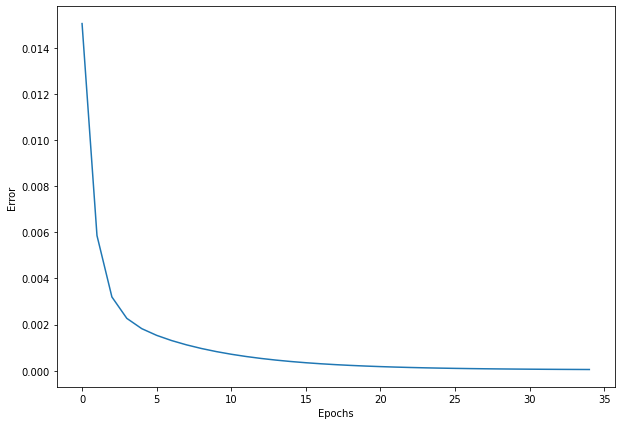

In [38]:
plt.figure(figsize=(10, 7))
plt.plot(errors)
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.show()

## 다항식

**샘플 데이터**를 생성합니다.

이번에는 Feature Data, 즉 X 값이 여러 개인 다항식의 경우에 대해서도 구해보도록 하겠습니다.

다항식에서는 X의 갯수 만큼, W 갯수도 늘어날 것입니다.

다만, bias (b)의 계수는 1개인 점에 유의해 주세요.

In [46]:
x1 = np.random.rand(100)
x2 = np.random.rand(100)
x3 = np.random.rand(100)

**다항식을 정의**합니다.

In [47]:
y = 0.3 * x1 + 0.5 * x2 + 0.7 * x3 + 0.9

## Gradient Descent 구현 (다항식)

In [50]:
errors = []
w1_grad = []
w2_grad = []
w3_grad = []

num_epoch=5000
learning_rate=0.5

w1 = np.random.uniform(low=0.0, high=1.0)
w2 = np.random.uniform(low=0.0, high=1.0)
w3 = np.random.uniform(low=0.0, high=1.0)

b = np.random.uniform(low=0.0, high=1.0)

for epoch in range(num_epoch):
    # 코드를 입력해 주세요
    y_hat = w1*x1 + w2 *x2 + w3*x3 + b

    # 코드를 입력해 주세요
    error = ((y_hat-y)**2).mean()
    if error < 0.00001:
        break

    # 코드를 입력해 주세요
    # 미분값 적용 (Gradient)
    w1 = w1 - learning_rate * ((y_hat-y)*x1).mean()
    w2 = w2 - learning_rate * ((y_hat-y)*x2).mean()
    w3 = w3 - learning_rate * ((y_hat-y)*x3).mean()

    b = b - learning_rate * (y_hat-y).mean()
    
    w1_grad.append(w1)
    w2_grad.append(w2)
    w3_grad.append(w3)
    
    errors.append(error)

    if epoch % 5 == 0:
        print("{0:2} w1 = {1:.5f}, w2 = {2:.5f}, w3 = {3:.5f}, b = {4:.5f} error = {5:.5f}".format(epoch, w1, w2, w3, b, error))
    
print("----" * 15)
print("{0:2} w1 = {1:.1f}, w2 = {2:.1f}, w3 = {3:.1f}, b = {4:.1f} error = {5:.5f}".format(epoch, w1, w2, w3, b, error))

 0 w1 = 0.60409, w2 = 0.60442, w3 = 0.34004, b = 0.88692 error = 0.05536
 5 w1 = 0.53686, w2 = 0.57525, w3 = 0.41087, b = 0.88528 error = 0.01469
10 w1 = 0.48727, w2 = 0.55639, w3 = 0.47048, b = 0.89050 error = 0.00917
15 w1 = 0.44796, w2 = 0.54200, w3 = 0.51762, b = 0.89439 error = 0.00573
20 w1 = 0.41681, w2 = 0.53105, w3 = 0.55493, b = 0.89727 error = 0.00358
25 w1 = 0.39213, w2 = 0.52275, w3 = 0.58446, b = 0.89936 error = 0.00224
30 w1 = 0.37258, w2 = 0.51647, w3 = 0.60786, b = 0.90086 error = 0.00140
35 w1 = 0.35711, w2 = 0.51174, w3 = 0.62640, b = 0.90190 error = 0.00088
40 w1 = 0.34487, w2 = 0.50820, w3 = 0.64112, b = 0.90260 error = 0.00055
45 w1 = 0.33519, w2 = 0.50556, w3 = 0.65281, b = 0.90304 error = 0.00034
50 w1 = 0.32754, w2 = 0.50362, w3 = 0.66209, b = 0.90328 error = 0.00022
55 w1 = 0.32150, w2 = 0.50219, w3 = 0.66948, b = 0.90339 error = 0.00014
60 w1 = 0.31673, w2 = 0.50116, w3 = 0.67537, b = 0.90339 error = 0.00009
65 w1 = 0.31298, w2 = 0.50043, w3 = 0.68007, b = 0.

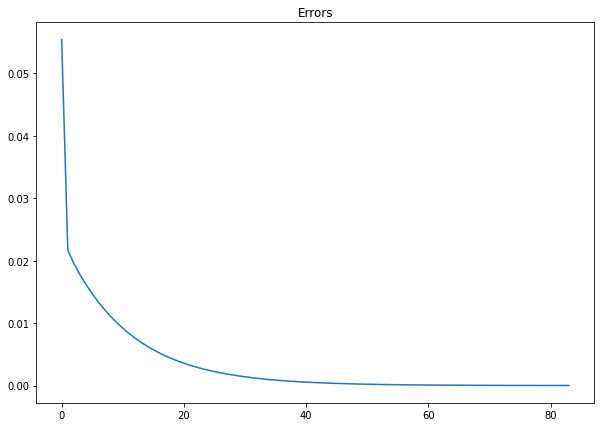

In [51]:
plt.figure(figsize=(10, 7))
plt.plot(errors)
plt.title('Errors')
plt.show()

## 가중치 (W1, W2, W3) 값들의 변화량 시각화

`Epoch`가 지남에 따라 어떻게 가중치들이 업데이트 되는지 시각화 해 봅니다.

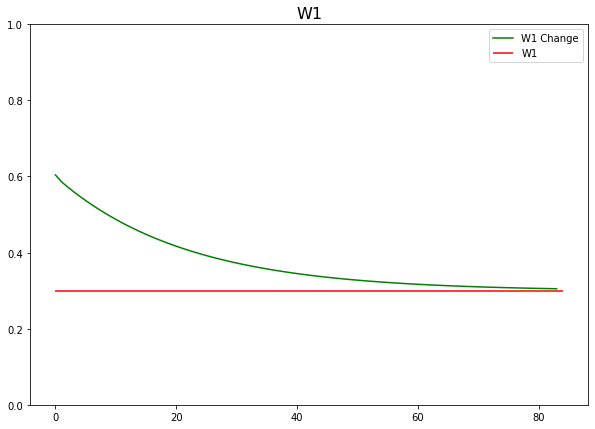

In [52]:
plt.figure(figsize=(10, 7))

plt.hlines(y=0.3, xmin=0, xmax=len(w1_grad), color='r')
plt.plot(w1_grad, color='g')
plt.ylim(0, 1)
plt.title('W1', fontsize=16)
plt.legend(['W1 Change', 'W1'])
plt.show()

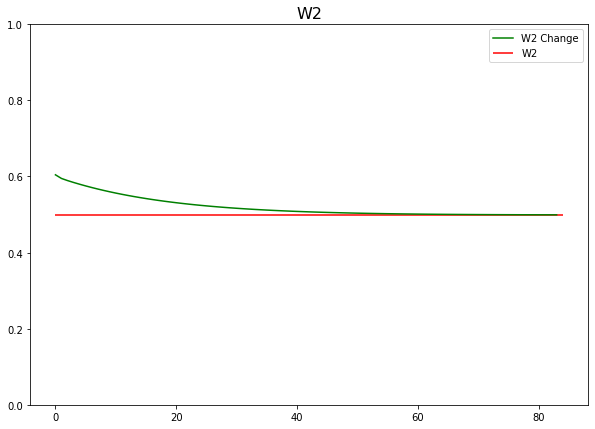

In [56]:
plt.figure(figsize=(10, 7))

plt.hlines(y=0.5, xmin=0, xmax=len(w2_grad), color='r')
plt.plot(w2_grad, color='g')
plt.ylim(0, 1)
plt.title('W2', fontsize=16)
plt.legend(['W2 Change', 'W2'])
plt.show()

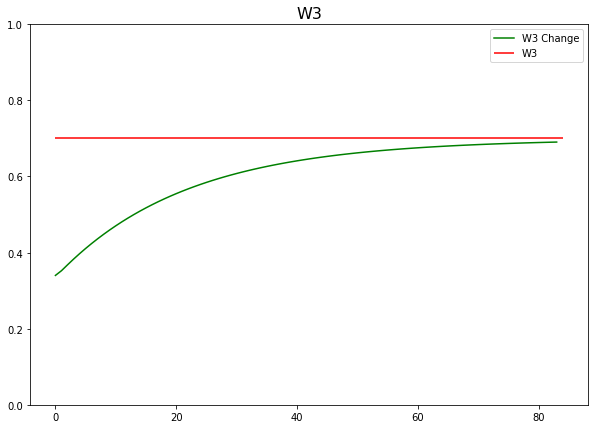

In [54]:
plt.figure(figsize=(10, 7))

plt.hlines(y=0.7, xmin=0, xmax=len(w3_grad), color='r')
plt.plot(w3_grad, color='g')
plt.ylim(0, 1)
plt.title('W3', fontsize=16)
plt.legend(['W3 Change', 'W3'])
plt.show()